# Investigating The Movie Database 

## Table of Contents

- [Introduction](https://jupyterlab.ahyarn.com/lab?#Introduction)
- [Data Wrangling](https://jupyterlab.ahyarn.com/lab?#Data-Wrangling)
    - [General Properties](https://jupyterlab.ahyarn.com/lab?#General-Properties)
    - [Questions](https://jupyterlab.ahyarn.com/lab?#Questions-I-would-like-answers-to-from-the-information-available.)
    - [Cleaning Functions](https://jupyterlab.ahyarn.com/lab?#Set-up-needed-functions-to-clean-data-to-make-it-easier-to-work-with)
- [Exploratory Data Analysis](https://jupyterlab.ahyarn.com/lab?#Explorartory-Data-Analysis)
    - [Has Movie Runtime Changed?](https://jupyterlab.ahyarn.com/lab?#Has-movie-runtime-changed-over-the-years?)
    - [Is the Release Data Important to Success](https://jupyterlab.ahyarn.com/lab?#Is-there-a-specific-time-of-the-year-or-week-where-movies-tend-to-perform-worse?)
- [Conclusions](https://jupyterlab.ahyarn.com/lab?#Conclusions)

## Introduction

The dataset I will be exploring is The Movie Database movie data, which has over 10,000 movies with 21 columns worth of information.

I will use a small set libraries for this dataset, datetime for date manipulations, pandas and numpy for data clearning and exploration. Finally seaborn and matplotlib for visualizations. The additional settings ensure plots are displayed properly, seaborn uses the ticks style, and scientific notation should not be shown.

## Questions I would like answers to from the information available.
#### - Has the runtime of movies changed over time?
#### - Is there a specific time of the year or week where movies tend to perform worse?

In [1]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style='darkgrid') # set seaborn style
pd.options.display.float_format = '{:20,.2f}'.format # prevent scientific notation
pd.set_option('display.max_columns', 0) # display all columns
plt.rcParams['figure.figsize'] = (12,8) # set plot size

---

## Data Wrangling

Throughout this section I will perform any needed data cleaning to make working with the data easier, as well as data manipulation to assist with finding answers to the proposed questions.

### General Properties

In [2]:
movie_database_contents = pd.read_csv("tmdb-movies.csv")

First we're going to import our dataset using pandas read_csv function.

In [3]:
movie_database_contents.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"


With the "head(2)" function we can look at our 2 rows of information. Viewing the data I can determine that multiple columns have multiple values separated by a pipe (|), and that the release_date column may not be formated as a date.

In [4]:
movie_database_contents.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

Next I wanted to determine what are the data types in the columns, to help me determine if data type changes need to occur.
Using pandas dtypes function, I can see release_date is a string instead of a datetime object, which I will need to change.

In [5]:
movie_database_contents.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,"10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00","10,866.00"
mean,"66,064.18",0.65,"14,625,701.09","39,823,319.79",102.07,217.39,5.97,"2,001.32","17,551,039.82","51,364,363.25"
std,"92,130.14",1.00,"30,913,213.83","117,003,486.58",31.38,575.62,0.94,12.81,"34,306,155.72","144,632,485.04"
min,5.00,0.00,0.00,0.00,0.00,10.00,1.50,"1,960.00",0.00,0.00
25%,"10,596.25",0.21,0.00,0.00,90.00,17.00,5.40,"1,995.00",0.00,0.00
50%,"20,669.00",0.38,0.00,0.00,99.00,38.00,6.00,"2,006.00",0.00,0.00
75%,"75,610.00",0.71,"15,000,000.00","24,000,000.00",111.00,145.75,6.60,"2,011.00","20,853,251.08","33,697,095.72"
max,"417,859.00",32.99,"425,000,000.00","2,781,505,847.00",900.00,"9,767.00",9.20,"2,015.00","425,000,000.00","2,827,123,750.41"


Using the describe function on the entire database will allow us to determine a few things.
- There is a total of 10,866 items in the dataset
- For multiple columns the minimum value is 0, which could indicate missing data
- The runtime column shows a maximum value of 900.00 which could indicate inaccurate data, or a series of movies counted as one.

---

### Set up needed functions to clean data to make it easier to work with

Based on the information obtained so far, I want to go ahead and set up functions that I can reuse when the need arises. This will reduce the overall amount of code needed, and reduce errors by not repeating the same code multiple times and potentially injecting errors in the calculations.


In [6]:
movie_database_contents.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,"137,999,939.28","1,392,445,892.52"
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,"137,999,939.28","348,161,292.49"


We want to keep our data visible using the "head(2)" function aagain, to ensure we're creating functions that will solve our problems. 

In [7]:
movie_database_contents = movie_database_contents[['original_title', 'cast', 'director', 'runtime', 'genres', 'release_date', 'release_year', 'budget_adj', 'revenue_adj']]

Based on the questions I want to find answers too, there are several columns that I will not need. By providing a list to our dataset, pandas will keep only the provided columns.

In [8]:
movie_database_contents = movie_database_contents.drop_duplicates()

To ensure that they are no duplicate values, we use pandas built in "drop_duplicates" function across the entire dataset.

In [9]:
movie_database_contents.shape

(10865, 9)

Using the "shape" function, we can determine that only 1 duplicate was in the dataset.

In [10]:
def split_cells_by_delimiter(values):
    return str(values).split("|")

split_cells_by_delimiter will take a column of values and separate values on the "|" character, and create a list of values

In [11]:
def correct_dates(val):
    if val.year > 2015:
        val = val - pd.Timedelta(100, unit='Y') - pd.Timedelta(18, unit='H') # - pd.Timedelta(18, units='H') ensures all our release dates have the same time.
    return val

correct_dates will change the release_date column to a proper datetime date type. The command checks to see if the year is greater than 2015, if it is, it subtracts 100 years and 18 hours from the specific value. Otherwise, we could have date values that have years into the future. I.E. for value 1/11/66, pandas would automatically convert this to 1/11/2066 instead of the 1/11/1966 

In [12]:
movie_database_contents['release_date'] = pd.to_datetime(movie_database_contents['release_date'])
movie_database_contents['release_date'] = movie_database_contents['release_date'].apply(correct_dates)

I used the apply function with the correct_dates fuction on the release_data column in our dataset to change the dtype of release_date from string to a actual datetime object, in case we need to do datetime calculations.

In [13]:
movie_database_contents[['cast', 'director', 'genres']] = movie_database_contents[['cast', 'director', 'genres']].applymap(split_cells_by_delimiter)

I used the apply function with the split_cells_by_delimter function on the columns cast, directory, and the genres, so they can easier to work with if needed.

In [14]:
movie_database_contents['release_month'] = movie_database_contents['release_date'].dt.month_name()
movie_database_contents['release_day'] = movie_database_contents['release_date'].dt.day_name()

To assist with determining specific times of the year for movies, I wanted two additional columns "release_month" and "release_day". Using the dt.month_name() on release date, it will create a new column with the Month as an integer. Using dt.day_name provides the day in interger format as well in our new column.

In [15]:
movie_database_contents[['budget_adj', 'revenue_adj']] = movie_database_contents[['budget_adj', 'revenue_adj']].astype(int)

For consistenacy I converted all the money related columns to integers using the "astype(int)" function.

In [16]:
movie_database_contents.head(2)

,original_title,cast,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj,release_month,release_day
0,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",[Colin Trevorrow],124,"[Action, Adventure, Science Fiction, Thriller]",2015-06-09,2015,137999939,1392445892,June,Tuesday
1,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",[George Miller],120,"[Action, Adventure, Science Fiction, Thriller]",2015-05-13,2015,137999939,348161292,May,Wednesday


By viewing the first 2 rows of our dataset, I can determine that cast, director,  and genres, were appropriately converted to a list of values. I can also see that our budget_adj and revenue_adj columns are now integers.

In [17]:
movie_database_contents.describe()

,runtime,release_year,budget_adj,revenue_adj
count,"10,865.00","10,865.00","10,865.00","10,865.00"
mean,102.07,"2,001.32","17,549,893.81","51,369,001.54"
std,31.38,12.81,"34,307,526.53","144,638,333.03"
min,0.00,"1,960.00",0.00,0.00
25%,90.00,"1,995.00",0.00,0.00
50%,99.00,"2,006.00",0.00,0.00
75%,111.00,"2,011.00","20,853,251.00","33,701,729.00"
max,900.00,"2,015.00","425,000,000.00","2,827,123,750.00"


Using the describe function again, it will allow me to further clean some of the columns that have missing or incorrect data.

In [18]:
movie_database_contents = movie_database_contents[(movie_database_contents['runtime'] >= 60) & (movie_database_contents['runtime'] <= 240)]

Using "boolean filtering" i.e. dataframe[dataframe[column] > 0] I will remove incorrect or missing values from the dataset.  
Here I wanted all movies with a runtime greater than or equal to 60 minutes and less than or equal to 240 minutes. 

In [19]:
movie_database_contents = movie_database_contents[movie_database_contents['budget_adj'] >= 10_000]

Using boolean filtering again, I only wanted movies with an adjusted budget of 10,000 or larger.

In [20]:
movie_database_contents = movie_database_contents[movie_database_contents['revenue_adj'] >= 10_000]

Using boolean filtering again, I only wanted movies with an adjusted revenue of 10,000 or larger.

In [21]:
movie_database_contents.describe()

,runtime,release_year,budget_adj,revenue_adj
count,"3,798.00","3,798.00","3,798.00","3,798.00"
mean,109.30,"2,001.25","44,699,196.16","138,900,275.07"
std,19.34,11.29,"44,776,792.48","217,035,412.37"
min,62.00,"1,960.00","15,775.00","10,164.00"
25%,96.00,"1,995.00","13,546,369.00","19,498,113.50"
50%,106.00,"2,004.00","30,383,599.00","63,127,971.00"
75%,119.00,"2,010.00","60,809,238.00","165,727,345.75"
max,219.00,"2,015.00","425,000,000.00","2,827,123,750.00"


Using describe again, I can verify that the columns I will be using no longer have 0 as a minimum value.

In [22]:
movie_database_contents['adj_gains'] = movie_database_contents['revenue_adj'] - movie_database_contents['budget_adj']

I created a new column "adj_gains" to determine the amount of money a movie lost or made by subtracting the column budget_adj from revenue_adj.

In [23]:
movie_database_contents['lost_money'] = movie_database_contents['adj_gains'].apply(lambda x: True if x < 0 else False)

To make it easier to colorize plots, I wanted a simple column that used a boolean value (True or False) to represent if the movie lost money. Lambda's are simply anonymous functions without names. Here it look at value and if it's greater than 0 it places "False" as the value, and True otherwise.

In [24]:
def consolidate_by_time_period(dataframe, time_period):
    consolidated_dataframe = dataframe.pivot_table(values='original_title', index='release_{}'.format(time_period), columns='lost_money', aggfunc='count').fillna(0).reset_index()
    # consolidated_dataframe = dataframe.pivot_table(values='original_title', index=f'release_{time_period}', columns='lost_money', aggfunc='count').fillna(0).reset_index()
    consolidated_dataframe['num_movies'] = consolidated_dataframe[True] + consolidated_dataframe[False]
    consolidated_dataframe['Percent Failed'] = (consolidated_dataframe[True] / consolidated_dataframe['num_movies']) * 100
    return consolidated_dataframe

For analyzing my second question, I created a reusable function that takes a data frame, and time_period as parameters to return a dataframe that has had a few things done to it:
- first a pivot table is made that aggregates the dataframe by time_period and a count of movies that lost money
- a new column is created which totals the number of movies for that time_period. i.e. movies that lost money + movies that made money
- creates a new column that shows the percentage of movies that failed at the boxoffice

In [25]:
def top_losses(dataframe, top_values):
    top_losses_dataframe = dataframe.sort_values('Percent Failed', ascending=False).head(top_values)
    return top_losses_dataframe

I wanted a function that would allow me to see "Top 20" or "Top 10" loses for one of our selected time periods. The function takes in a dataframe and the number of values I would like to see. It sorts the dataframe by "Percent Failed" and the head function to return a dataframe with the only the "top values".

In [26]:
movie_database_contents.tail(25)

,original_title,cast,director,runtime,genres,release_date,release_year,budget_adj,revenue_adj,release_month,release_day,adj_gains,lost_money
10724,On Her Majesty's Secret Service,"[George Lazenby, Diana Rigg, Telly Savalas, Ga...",[Peter R. Hunt],142,"[Adventure, Action, Thriller]",1969-12-12,1969,41609849,487278044,December,Friday,445668195,False
10725,Butch Cassidy and the Sundance Kid,"[Paul Newman, Robert Redford, Katharine Ross, ...",[George Roy Hill],110,"[History, Drama, Western, Crime]",1969-09-23,1969,35665585,608151066,September,Tuesday,572485481,False
10727,Midnight Cowboy,"[Dustin Hoffman, Jon Voight, Sylvia Miles, Joh...",[John Schlesinger],113,[Drama],1969-05-25,1969,21399351,266214187,May,Sunday,244814836,False
10728,The Wild Bunch,"[Ernest Borgnine, William Holden, Robert Ryan,...",[Sam Peckinpah],145,"[Adventure, Western]",1969-06-17,1969,37116502,3796250,June,Tuesday,-33320252,True
10755,Grease,"[John Travolta, Olivia Newton-John, Stockard C...",[Randal Kleiser],110,[Music],1978-07-07,1978,20056204,607749015,July,Friday,587692811,False
10756,Jaws 2,"[Roy Scheider, Lorraine Gary, Murray Hamilton,...",[Jeannot Szwarc],116,"[Horror, Thriller]",1978-06-16,1978,66854013,628040000,June,Friday,561185987,False
10757,Dawn of the Dead,"[David Emge, Ken Foree, Scott H. Reiniger, Gay...",[George A. Romero],127,[Horror],1978-09-02,1978,2172755,183848538,September,Saturday,181675783,False
10758,Superman,"[Marlon Brando, Gene Hackman, Christopher Reev...",[Richard Donner],143,"[Adventure, Fantasy, Action, Science Fiction]",1978-12-14,1978,183848538,1003538977,December,Thursday,819690439,False
10759,Halloween,"[Donald Pleasence, Jamie Lee Curtis, P.J. Sole...",[John Carpenter],91,"[Horror, Thriller]",1978-10-25,1978,1002810,233989048,October,Wednesday,232986238,False
10760,Animal House,"[John Belushi, Tim Matheson, John Vernon, Vern...",[John Landis],109,[Comedy],1978-07-27,1978,9025291,471320797,July,Thursday,462295506,False


Finally, before I moved on to analyzing the dataset I wanted to verify that I have all the necessary columns and that they are formatted correctly so I can begin trying to find answers to my questions. Using the tail(25) function, I can see the last 25 items of the dataset, and can see that all the added columns have appropriate values.

---

## Explorartory Data Analysis

Now that the data has been cleaned, and is more managable. I can begin exploration of the data set to try to answer my questions
- Has the runtime of movies changed over time?
- Is there a specific time of the year or week where movies tend to perform worse?

## Has movie runtime changed over the years?

In [27]:
movie_database_contents['runtime'].describe()

count               3,798.00
mean                  109.30
std                    19.34
min                    62.00
25%                    96.00
50%                   106.00
75%                   119.00
max                   219.00
Name: runtime, dtype: float64

Using the describe function on the runtime column we can take away a few things:
- the mean runtime of movies in the dataset is 109.30
- the max is 219
- half of the movies are under 107 minutes in length

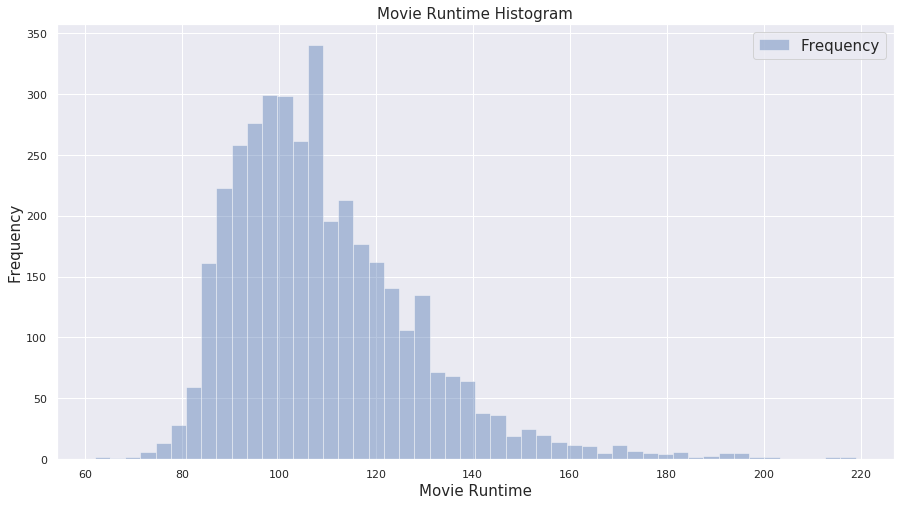

In [28]:
f, ax = plt.subplots(figsize=(15, 8))
sns.distplot(movie_database_contents['runtime'], hist=True,kde=False, axlabel='Movie Runtime', label="Frequency")
plt.ylabel("Frequency", fontsize=15)
plt.xlabel("Movie Runtime", fontsize=15)
plt.title("Movie Runtime Histogram", fontsize=15)
plt.legend(prop={'size': 15})

Using seaborn, I ploted a histrogram of the runtime data to see the distribution of the data. We can see that a majority of the movie runtimes are between 90 and 120 minutes.  
Using plt.ylabel, xlabel, title, and label I can specify all the chart labels for easier viewing.

In [29]:
mdb_by_year = movie_database_contents.groupby('release_year', as_index=False).mean()

Here I group the dataframe by release year, and averaged their results. This will allow me to make a line graph showing trends over the entire time range.

Text(0.5, 0, 'Release Year')

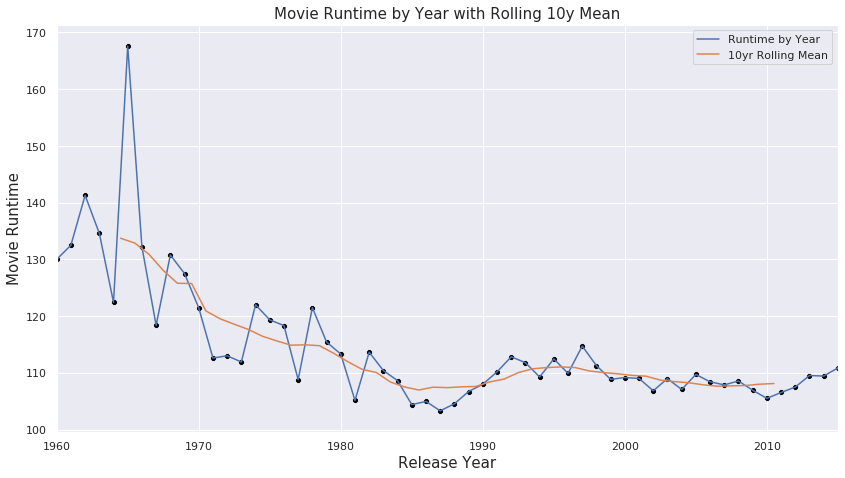

In [30]:
f, ax1 = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True, figsize=(14, 7.5)) # make charts share x and y axis, and set the chart size
# plot the average run time by year
mdb_by_year.plot(x='release_year', y='runtime', label='Runtime by Year', ax=ax1)

# overlap dots over the average run time by year for increased visibility
sns.scatterplot(x='release_year', y='runtime', data=mdb_by_year, color='black', ax=ax1)

# plot the 10 year rolling average to view trends easier
mdb_by_year.rolling(10).mean().plot(x='release_year', y='runtime', label='10yr Rolling Mean', ax=ax1)
plt.title("Movie Runtime by Year with Rolling 10y Mean", fontsize=15)
plt.ylabel("Movie Runtime", fontsize=15)
plt.xlabel("Release Year", fontsize=15)

For this chart, I wanted to look at the average runtime by year and incorporate a 10 year rolling average to see the trend over time. To plot this chart I needed to:
- set parameters for matplotlib to allow multiple charts to overlap
- Create the line plot for the entire dataset by year and supply ax=ax1 to ensure it attaches to our customized matplotlib parameters
- Overlay a scatter plot on our line plot to have nice peak dots
- Used pandas "rolling(10).mean()" function on the original dataframe to overlay a 10 year rolling mean to show a trend for movie runtimes over the years.

Text(0.5, 48.49999999999994, 'Release Year')

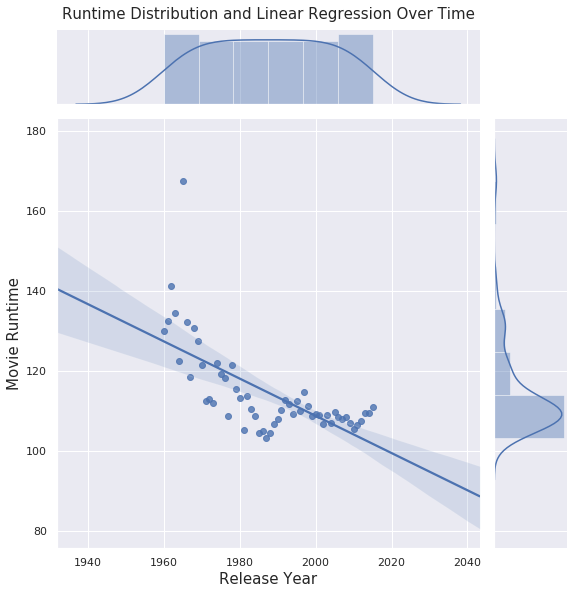

In [31]:
sns.jointplot(x='release_year', y='runtime', data=mdb_by_year, kind='reg', marginal_kws=dict(bins=6), height=8)
plt.title("Runtime Distribution and Linear Regression Over Time", pad=100, fontsize=15)
plt.ylabel("Movie Runtime", fontsize=15)
plt.xlabel("Release Year", fontsize=15)

With a jointplot from the seaborn library, we can see that movie runtimes are between 100 and 110 minutes, and have been decreasing over the decades and equalizing around the 100 minute mark. The jointplot allow provides a linear regression indicating the same decline over the years.  
To ensure our plot title was in the correct place, I had to supply "pad=100" to move it out of the center of the plot.

---

# Is there a specific time of the year or week where movies tend to perform worse?

In [32]:
movie_database_contents.describe()

,runtime,release_year,budget_adj,revenue_adj,adj_gains
count,"3,798.00","3,798.00","3,798.00","3,798.00","3,798.00"
mean,109.30,"2,001.25","44,699,196.16","138,900,275.07","94,201,078.90"
std,19.34,11.29,"44,776,792.48","217,035,412.37","195,083,258.07"
min,62.00,"1,960.00","15,775.00","10,164.00","-413,912,431.00"
25%,96.00,"1,995.00","13,546,369.00","19,498,113.50","-1,356,302.50"
50%,106.00,"2,004.00","30,383,599.00","63,127,971.00","28,603,964.00"
75%,119.00,"2,010.00","60,809,238.00","165,727,345.75","109,004,230.75"
max,219.00,"2,015.00","425,000,000.00","2,827,123,750.00","2,750,136,651.00"


Using Pandas describe function like before, I can get a summarized overview of the dataset. 

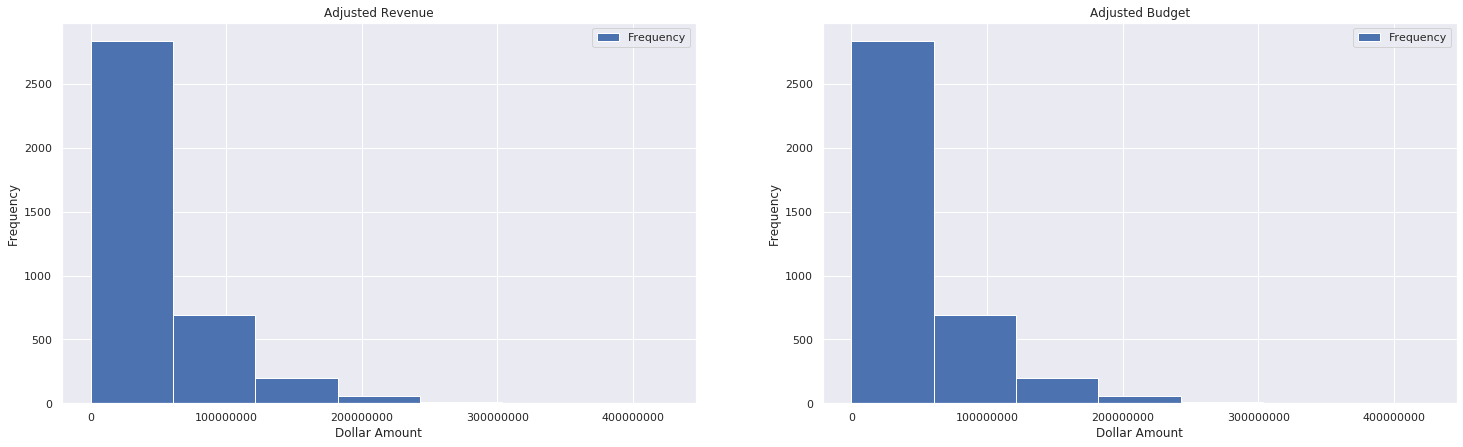

In [33]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(25, 7))
ax1.ticklabel_format(style='plain')
movie_database_contents['budget_adj'].plot.hist(title="Adjusted Revenue", label="Frequency", bins=7, ax=ax1)
ax1.set_xlabel("Dollar Amount")
ax1.legend()
ax2.ticklabel_format(style='plain')
movie_database_contents['budget_adj'].plot.hist(title="Adjusted Budget", label="Frequency", bins=7, ax=ax2)
ax2.set_xlabel("Dollar Amount")
ax2.legend()

Using a histplot on both budget and revenue columns, we can see that both histograms are left skewed. To create both charts together I did:
- Set matplotlib parameters nrows=1, and ncols=2 to allow 2 charts on 1 row
- To correctly format the xaxis "Dollar Amount"; I supplied the ticklabel_format style a value of "plain" to remove scientific notation
- I set both charts to show 7 bins to have an easier time viewing the content

In [34]:
movie_db_year = consolidate_by_time_period(movie_database_contents, "year")

Here I used the consolidate_by_time_period function I made earlier and supplied the original dataframe and the "year" parameter to create an aggregated count of successful, failed, and total movie counts by year.

Text(0.5, 1.0, 'Total and Failed Box Office Results by Year')

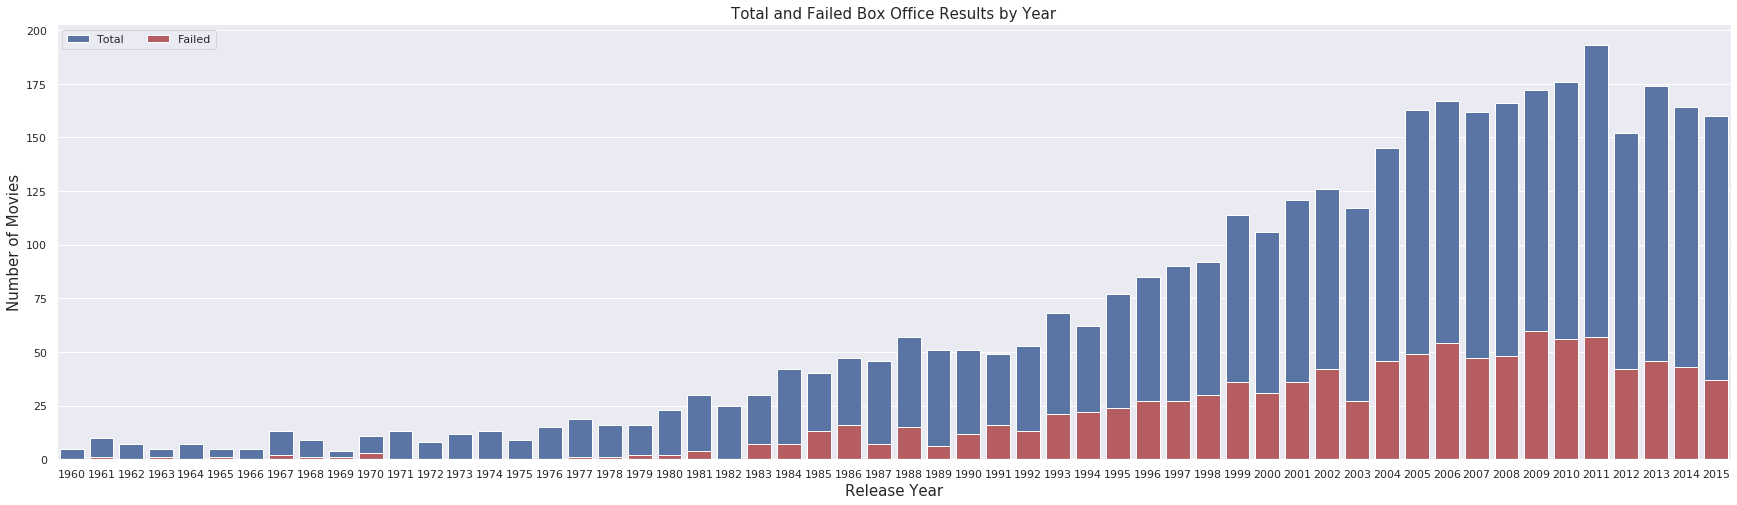

In [35]:
f, ax = plt.subplots(figsize=(30, 8))
sns.barplot(y='num_movies', x='release_year', data=movie_db_year, color='b', label='Total', ax=ax)
sns.barplot(y=True, x='release_year', data=movie_db_year, color='r', label='Failed', ax=ax)
ax.legend(ncol=2, loc="upper left", frameon=True)
# ax.set(ylabel="Number of Movies", xlabel="Release Year")
plt.ylabel("Number of Movies", fontsize=15)
plt.xlabel("Release Year", fontsize=15)
plt.title("Total and Failed Box Office Results by Year", fontsize=15)

I wanted to see how common movies losing money has been over the years. To create the above plot I had to:
- set parameters to ensure the chart was easily readable, so our figsize was 30 wide, and 6 tall
- Created the "total" bar plot, showing how many movies were released for a given year, and provided "b" for blue for the color selection
- Created an additional barplot that shows the count of "failed" movies per year, and provided the "r" to indicate red for this barplot, to help distinguish the information
- finally I provided legend, labels, and title parameters to illustrate the plot better

In [36]:
top_20_fails_by_year = top_losses(movie_db_year, 20)
top_20_fails_by_year

lost_money,release_year,False,True,num_movies,Percent Failed
34,1994,40.00,22.00,62.00,35.48
49,2009,112.00,60.00,172.00,34.88
26,1986,31.00,16.00,47.00,34.04
42,2002,84.00,42.00,126.00,33.33
31,1991,33.00,16.00,49.00,32.65
38,1998,62.00,30.00,92.00,32.61
25,1985,27.00,13.00,40.00,32.50
46,2006,113.00,54.00,167.00,32.34
50,2010,120.00,56.00,176.00,31.82
36,1996,58.00,27.00,85.00,31.76


Using the top_losses function I made earlier, I wanted to see which years had the worse performance. Supplying our function with the consolidated dataframe, and "20" I can see the top 20 years with the highest percentage of failures.  
Using the function on the yearly dataframe, we can see that 1994 has the highest percentage of movies that lost money overall. While 2011 produced the most movies.

In [37]:
movie_db_month = consolidate_by_time_period(movie_database_contents, "month")

Next, I wanted to take a look at specific months. I used the consolidate function to make a dataframe aggregated movie counts by month.  

In [38]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
movie_db_month['release_month'] = pd.Categorical(movie_db_month['release_month'], categories=months, ordered=True)

I wanted the plots I'm going to create to be sorted correctly like a calendar; Jan to December, otherwise the months will be shown in a random fashion. To achieve this:
- I created a months list that follows a calendar progression
- To ensure our plots followed the list, I used pd.Categorical to set the release_month column to a category, and retain the order supplied to the function

Text(0.5, 0, 'Release Month')

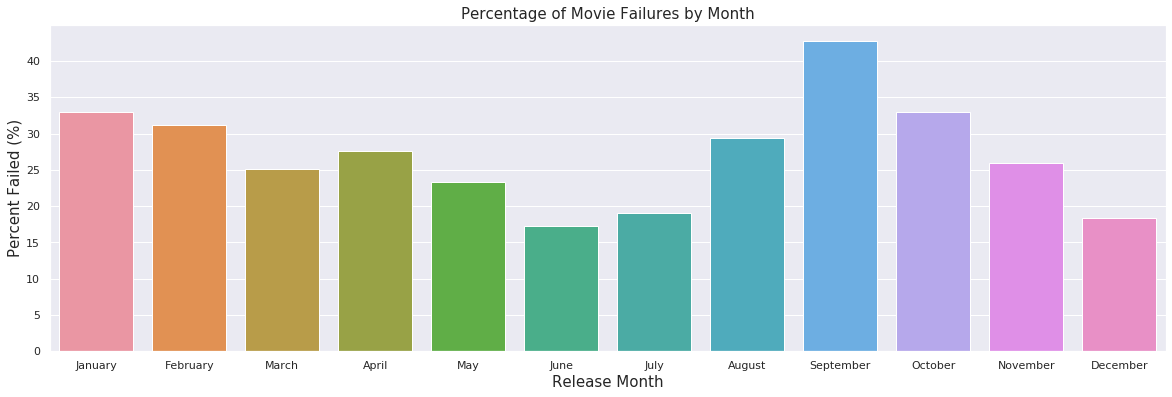

In [39]:
f, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='release_month', y='Percent Failed', data=movie_db_month)
plt.title("Percentage of Movie Failures by Month", fontsize=15)
plt.ylabel("Percent Failed (%)", fontsize=15)
plt.xlabel("Release Month", fontsize=15)

Looking at the barplot, we can see that September is the month the where the most movies that have lost money, followed by October. Making the plot is as simple as supplying sns.barplot the x and y axis values, and the dataframe I wanted to use which was movie_db_month. plt.title() was used to supply the plot with the appropriate title.

Text(0.5, 0, 'Release Month')

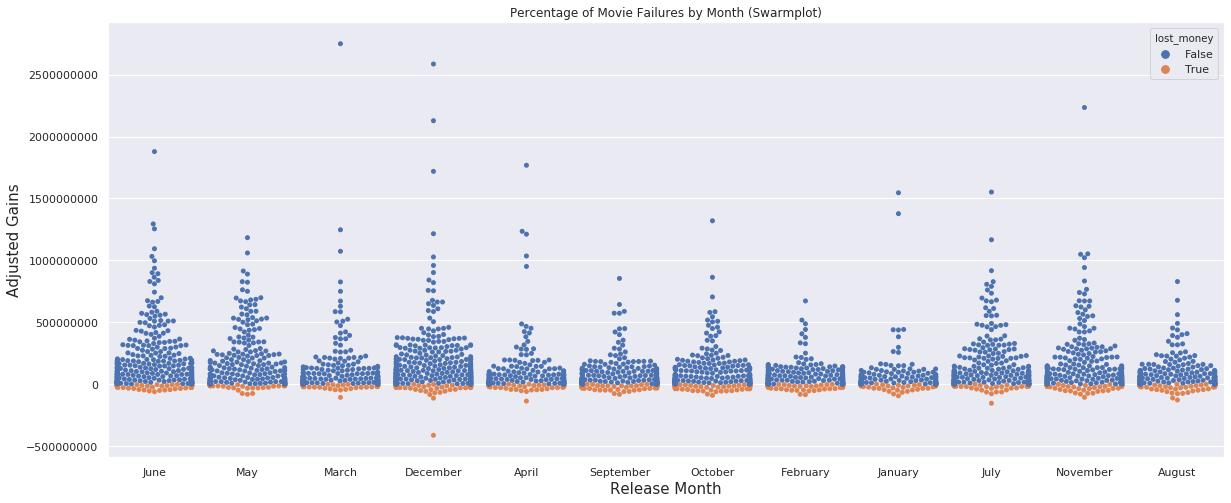

In [40]:
f, ax = plt.subplots(figsize=(20, 8))
ax.ticklabel_format(style='plain')
sns.swarmplot(x='release_month', y='adj_gains',hue='lost_money', data=movie_database_contents)
plt.title("Percentage of Movie Failures by Month (Swarmplot)")
plt.ylabel("Adjusted Gains", fontsize=15)
plt.xlabel("Release Month", fontsize=15)

Here I used a swarmplot to highlight the +/- box office gains, with color coding to indicate if money was lost. To create the swarmplot:
- I supplied matplotlib with the figsize=(20,8) parameters to ensure the plot was easily viewable.
- To help illustrate movies that lost money, I supplied the "hue" paremter with the "lost_money" column. On the plot, orange indicates that a movie lost money.  
  
Using the swarmplot allow me to see additional information such as March having the best performing movie, and December having the worst performing movie.

In [41]:
top_losses_by_month = top_losses(movie_db_month, 12)
top_losses_by_month

lost_money,release_month,False,True,num_movies,Percent Failed
11,September,259,194,453,42.83
4,January,146,72,218,33.03
10,October,238,117,355,32.96
3,February,172,78,250,31.20
1,August,235,98,333,29.43
0,April,191,73,264,27.65
9,November,223,78,301,25.91
7,March,205,69,274,25.18
8,May,220,67,287,23.34
5,July,255,60,315,19.05


Once again, I wanted a table summary to verify results. So I used the top_losses function again to generate the table by passing our month dataframe, and the parameter 12 to it.   
September had the most movies that lost money, however it also had the most movies.

In [42]:
movie_db_day = consolidate_by_time_period(movie_database_contents, "day")

Next, I wanted to take a look at specific days. I followed the same procedure as the month views. By reusing functions, the amount of code is reduced.

In [43]:
days = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
movie_db_day['release_day'] = pd.Categorical(movie_db_day['release_day'], categories=days, ordered=True)

I wanted the plots I'm going to create to be sorted correctly like a calendar; Sunday to Saturday, otherwise the days will be shown in a random fashion. To achieve this:
- I created a days list that follows a calendar progression
- To ensure our plots followed the list, I used pd.Categorical to set the release_day column to a category, and retain the order supplied to the function

Text(0.5, 0, 'Day of Week')

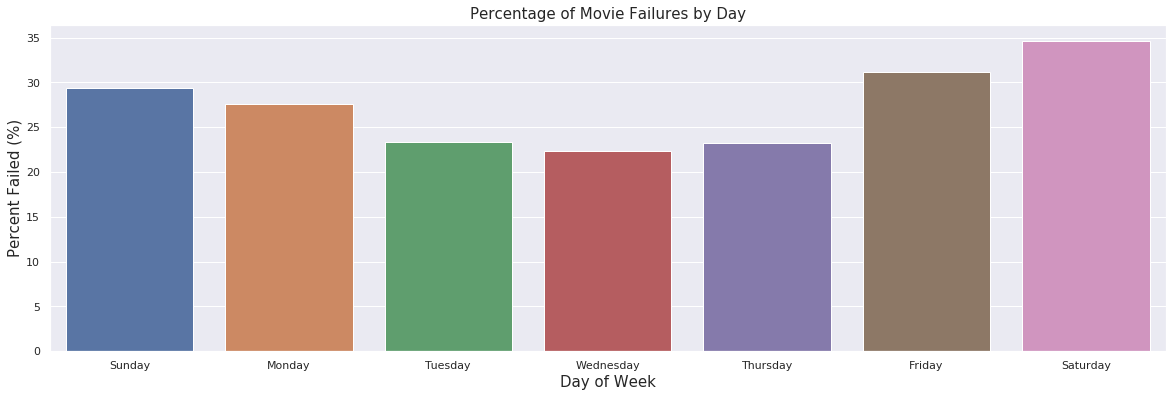

In [44]:
f, ax = plt.subplots(figsize=(20, 6))
sns.barplot(x='release_day', y='Percent Failed', data=movie_db_day)
plt.title("Percentage of Movie Failures by Day", fontsize=15)
plt.ylabel("Percent Failed (%)", fontsize=15)
plt.xlabel("Day of Week", fontsize=15)

From the looks of the barplot, Friday and Saturday have the highest percentage of box office failures. Creating the plot was the same steps used in the month plot.

Text(0.5, 0, 'Day of Week')

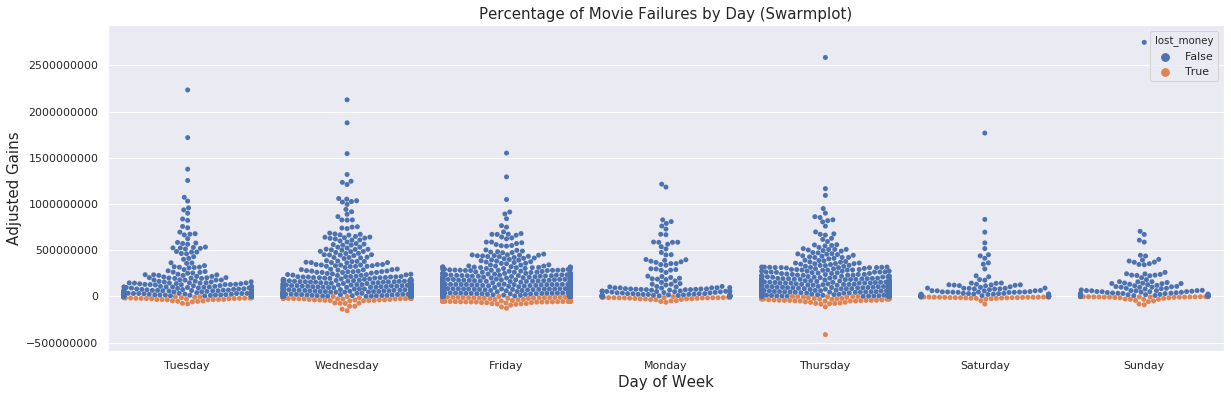

In [45]:
f, ax = plt.subplots(figsize=(20, 6))
ax.ticklabel_format(style='plain')
sns.swarmplot(x='release_day', y='adj_gains',hue='lost_money', data=movie_database_contents)
plt.title("Percentage of Movie Failures by Day (Swarmplot)", fontsize=15)
plt.ylabel("Adjusted Gains", fontsize=15)
plt.xlabel("Day of Week", fontsize=15)

Here I used a swarmplot to highlight the +/- box office gains, with color coding to indicate if money was lost. To create the swarmplot:
- I supplied matplotlib with the figsize=(20,8) parameters to ensure the plot was easily viewable.
- To help illustrate movies that lost money, I supplied the "hue" paremter with the "lost_money" column. On the plot, orange indicates that a movie lost money.  
  
The benefits of using the swarmplot allow me to see additional information such as Thursday having the best and worst performing movie.

In [46]:
top_losses_by_day_of_week = top_losses(movie_db_day, 7)
top_losses_by_day_of_week

lost_money,release_day,False,True,num_movies,Percent Failed
2,Saturday,98,52,150,34.67
0,Friday,1133,512,1645,31.12
3,Sunday,96,40,136,29.41
1,Monday,126,48,174,27.59
5,Tuesday,210,64,274,23.36
4,Thursday,596,180,776,23.20
6,Wednesday,499,144,643,22.40


Once again, I wanted a table summary to verify results. So I used the top_losses function again to generate the table by passing our day dataframe, and the parameter 7 to it.   
Saturday had the highest percentage of movies that lost money, while Wednesday had the lowest percentage of movie failures.

---

## Conclusions

For the Explorartory Data Analysis of The Movie Database data, I observed several interesting things. 

Delving into the data to see if movie runtimes have changed over the years, was interesting and enlightening. Before and after
removing outliers, more than 50% of the movies had a runtime under 107 minutes. Most of the movies with longer run times were from the 
1960s, and runtimes have more or less decreased over the years finally plateauing between 110 and 100 minutes as seen in the line chart, and jointgrid plots.

Attempting to find answers to my second question proved to be more challenging. There's additional variables that cannot be accounted for
such as where the film was released, a reliable popularity variable, and world events. Even though it wasn't part of my question, I still
wanted to see which year had the highest percentage of movies that lost money. 1986 and 1994 had 36.07% and 34.04% of their movies loss money.
At first glance it was surprising that September had the highest percentage of movie failures. However, further analysis shows that September has 
had the highest number of movie releases. It's curious that movies released on Saturday have the highest percentage of movie failures. I did not expect this
going into the analysis.

##### Limitations of Dataset
After conducting analysis of the provided dataset. There are liminations that must be considered. There is clearly erroneous data in the dataset, columns such as "budget_adj" and "revenue_adj" have 0 as values. There's movies from other countries that may or may not have converted their revenue and budget to USD. There's also no clear definition of what constitues a movie, for example "Taken" released in 2002 has a run time of 877 minutes, and on imdb.com, wikipedia.com,and tv guide; it is considered a mini-series or tv show not a movie. We also do not know if world or localized events occured during a movies release  that could have impacted their revenue. If I wanted to breakdown movie performance even further, such as seeing which actor/actress performed the best or worst. It would be difficult if not impossible due to not knowing if the cast column includes the entire cast, or just the most popular individuals at the time. Since we don't know how this dataset was generated and the accuracy of the data, it's not possible to state that our analysis applies to all movies. 

Resources Referenced:
- https://seaborn.pydata.org/index.html
- https://pandas.pydata.org/pandas-docs/stable/index.html
- https://www.imdb.com
- https://en.wikipedia.org/
- https://www.tvguide.com/